# SQL Challeng

Being familiar with SQL, I first prepared the data in SQL. It was joined and aggregated and SQLAlchemy was utilized to import and create a dataframe. I did not have to use Python to manipulate the data any further at that point and used Matplotlib to create a bar plot.

Then I decided to try without using SQL. I imported titles and salaries tables and created a dataframe for each. Merged the dataframes and aggregated it by title and salary. It took longer than the first attempt because I had to look up syntax and there was an extra step. It was good to see how two approaches are different and helped me know what I need to work on more. 


In [32]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [33]:

POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'changeme' 
POSTGRES_DBNAME = 'sql_challenge' 
POSTGRES_ADDRESS = 'localhost'

postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(
    username=POSTGRES_USERNAME, 
    password=POSTGRES_PASSWORD, 
    ipaddress=POSTGRES_ADDRESS, 
    port=POSTGRES_PORT, 
    dbname=POSTGRES_DBNAME)) 

conn = create_engine(postgres_str)

## Option 1

In [23]:

data = pd.read_sql("""

SELECT title, ROUND(AVG(salary),2) As AvgSalaryByTitle FROM titles e 
    JOIN salaries s 
    ON e.emp_no = s.emp_no
GROUP BY title


""", conn)

In [24]:
data

,title,avgsalarybytitle
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


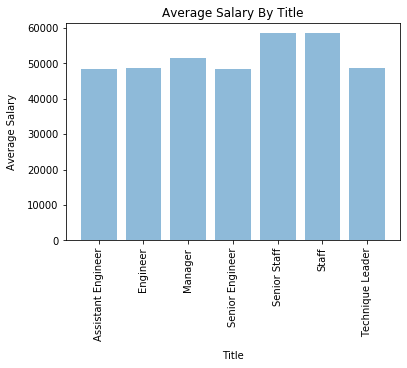

In [25]:
x = data.title
y = data.avgsalarybytitle

plt.xlabel("Title", labelpad=10)
plt.ylabel("Average Salary",labelpad=10)
plt.title("Average Salary By Title")
plt.xticks(rotation='vertical')
# plt.ylim(0, 60000)
plt.bar( x,y, align='center', alpha=0.5)

plt.show()

## Option 2

In [35]:

titles = pd.read_sql("""

SELECT *  FROM titles 

""", conn)


salaries = pd.read_sql("""

SELECT *  FROM salaries 

""", conn)



In [36]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01 00:00:00
1,10002,Staff,1996-08-03,9999-01-01 00:00:00
2,10003,Senior Engineer,1995-12-03,9999-01-01 00:00:00
3,10004,Engineer,1986-12-01,1995-12-01 00:00:00
4,10004,Senior Engineer,1995-12-01,9999-01-01 00:00:00


In [37]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [38]:
merged = pd.merge(titles,salaries, on="emp_no", how="inner", suffixes=('_titles','salaries') )

In [39]:
merged.head()

,emp_no,title,from_date_titles,to_date_titles,salary,from_datesalaries,to_datesalaries
0,10001,Senior Engineer,1986-06-26,9999-01-01 00:00:00,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01 00:00:00,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01 00:00:00,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01 00:00:00,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01 00:00:00,40054,1986-12-01,1987-12-01


In [48]:
merged_groupby = merged.groupby(["title"])
# merged_groupby.head()
average_salary = merged_groupby["salary"].mean()
average_salary.head()


title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Name: salary, dtype: float64

In [41]:


average_by_titile = pd.DataFrame({"average":average_salary
                                   })
average_by_titile = average_by_titile.reset_index()
average_by_titile

,title,average
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


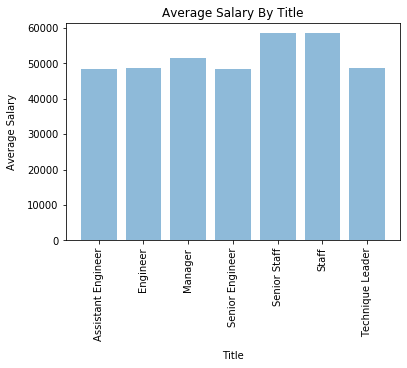

In [49]:
x = average_by_titile["title"]
y = average_by_titile["average"]

plt.xlabel("Title", labelpad=10)
plt.ylabel("Average Salary",labelpad=10)
plt.title("Average Salary By Title")
plt.xticks(rotation='vertical')
# plt.ylim(0, 60000)
plt.bar( x,y, align='center', alpha=0.5)

plt.show()